In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [5]:
edu_df.info()
edu_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [6]:
edu_df.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1488,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1489,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1490,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False


In [9]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = edu_df["STATE"].unique()

for state in states:
    edu_df.loc[edu_df["STATE"] == state, fill_list] = edu_df.loc[edu_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
edu_df.dropna(inplace=True)

edu_df.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


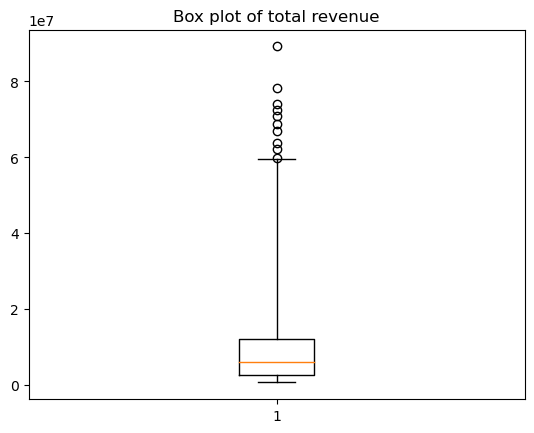

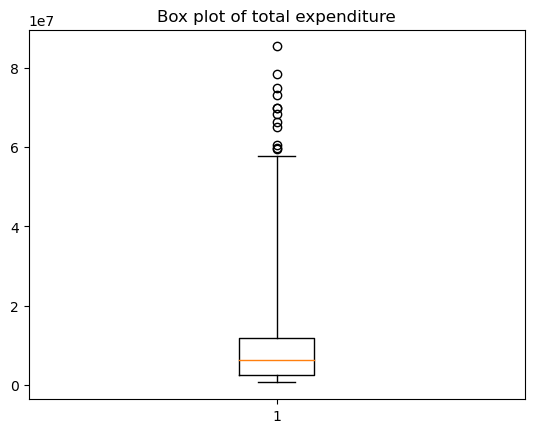

In [12]:
plt.boxplot(edu_df["TOTAL_REVENUE"], whis=5)
plt.title("Box plot of total revenue")
plt.show()

plt.boxplot(edu_df["TOTAL_EXPENDITURE"], whis=5)
plt.title("Box plot of total expenditure")
plt.show()

Yes there are outliers for both columns.

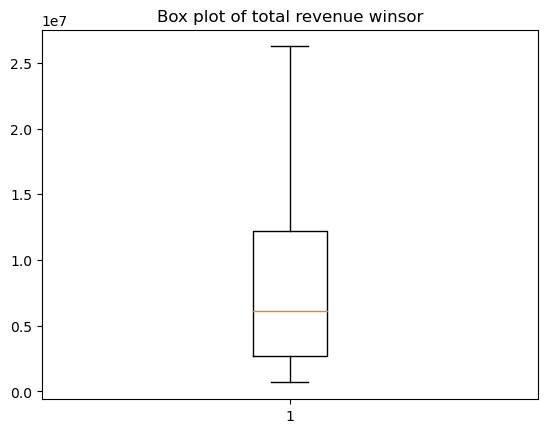

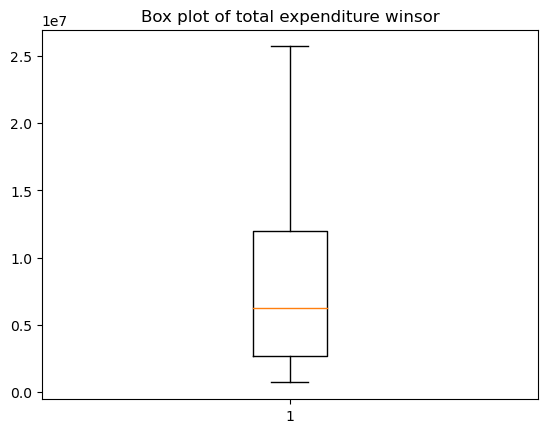

In [14]:
from scipy.stats.mstats import winsorize

win_rev = winsorize(edu_df["TOTAL_REVENUE"], (0, 0.10))
plt.boxplot(win_rev)
plt.title("Box plot of total revenue winsor")
plt.show()

win_exp = winsorize(edu_df["TOTAL_EXPENDITURE"], (0, 0.10))
plt.boxplot(win_exp)
plt.title("Box plot of total expenditure winsor")
plt.show()

The outliers have been removed from both.

In [15]:
budget_dif = edu_df.TOTAL_REVENUE - edu_df.TOTAL_EXPENDITURE

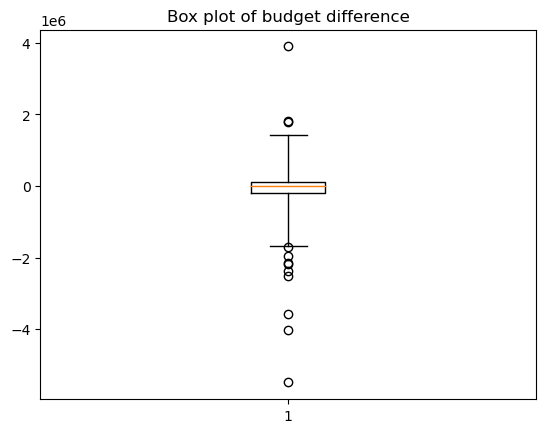

In [16]:
plt.boxplot(budget_dif, whis=5)
plt.title("Box plot of budget difference")
plt.show()

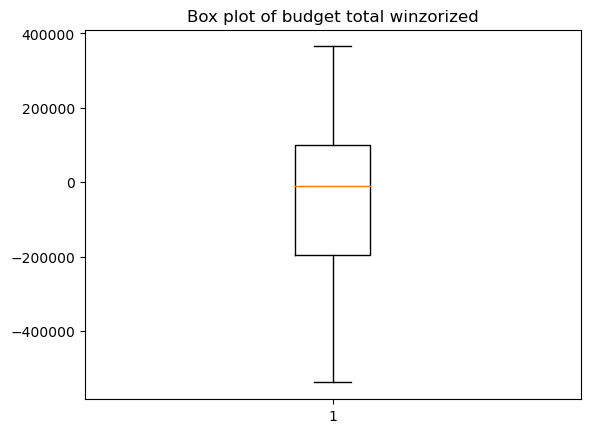

In [22]:
win_dif = winsorize(budget_dif, (0.10, 0.10))
plt.boxplot(win_dif)
plt.title("Box plot of budget total winzorized")
plt.show()

Next is for the difference between data with no outliers:

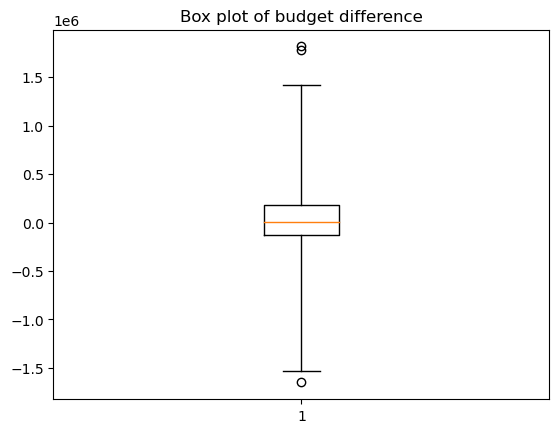

In [23]:
adjusted_dif = win_rev - win_exp
plt.boxplot(adjusted_dif, whis=5)
plt.title("Box plot of budget difference")
plt.show()

There are some outliers, so I will remove them similar to the previous data.

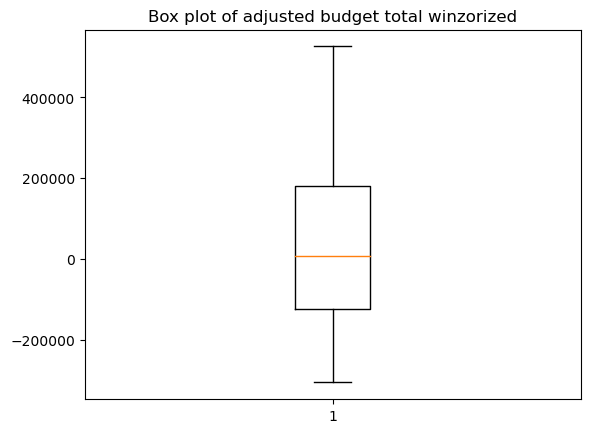

In [24]:
win_adj = winsorize(adjusted_dif, (0.10, 0.10))
plt.boxplot(win_adj)
plt.title("Box plot of adjusted budget total winzorized")
plt.show()

In [25]:
pd.DataFrame({"original_budget": budget_dif, "winsorized_budget1": win_dif,
              "winsorized_budget2": win_adj}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-46221.075107,58068.461373
std,6.144222e+05,256023.510074,261701.775745
min,-5.487742e+06,-538253.000000,-306362.000000
25%,-1.965748e+05,-196574.750000,-123882.250000
50%,-8.872500e+03,-8872.500000,8133.500000
75%,1.013948e+05,101394.750000,180287.250000
max,3.897129e+06,365079.000000,526078.000000


Based on the data, each method has different values for every category. For example, the mean is different for each one, meaning that the method of removing outliers does have an impact on the results.

The preffered method would probably be the one using the raw data and then removing the outliers after the new data from the differences was created. This is because the data is not modified prior to removing the outliers so it would be more accurate of the data.